# Mini Project using statistics + linear algebra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
tips = sns.load_dataset("tips")

In [3]:
print("Basic Statistics Recap")
print()
print("Mean Total Bill:", np.mean(tips["total_bill"]))
print()
print("Median Total Bill:", np.median(tips["total_bill"]))
print()
print("Variance Total Bill:", np.var(tips["total_bill"], ddof=1))
print()

# Confidence Interval for Mean
mean = np.mean(tips["total_bill"])
std_err = stats.sem(tips["total_bill"])
h = std_err * stats.t.ppf((1 + 0.95) / 2, len(tips)-1)
print(f"95% CI for Mean: ({mean - h:.2f}, {mean + h:.2f})")
print()

# Hypothesis Testing
male_bills = tips[tips["sex"] == "Male"]["total_bill"]
female_bills = tips[tips["sex"] == "Female"]["total_bill"]

t_stat, p_val = stats.ttest_ind(male_bills, female_bills, equal_var=False)

print("T-test Male vs Female Bills:")
print()
print("t-statistic =", t_stat, "p-value =", p_val)


# Correlation & Covariance
corr = tips[["total_bill", "tip"]].corr()
cov = tips[["total_bill", "tip"]].cov()

print("Correlation Matrix:\n", corr)
print()
print("Covariance Matrix:\n", cov)


# Linear Algebra - Eigenvalues & SVD
A = cov.values  # Using covariance matrix
eigvals, eigvecs = np.linalg.eig(A)
print("Eigenvalues:", eigvals)
print()
print("Eigenvectors:\n", eigvecs)

U, S, Vt = np.linalg.svd(A)
print("\nSingular Values (SVD):", S)

Basic Statistics Recap

Mean Total Bill: 19.78594262295082

Median Total Bill: 17.795

Variance Total Bill: 79.25293861397827

95% CI for Mean: (18.66, 20.91)

T-test Male vs Female Bills:

t-statistic = 2.3733978410287073 p-value = 0.0185733948549217
Correlation Matrix:
             total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000

Covariance Matrix:
             total_bill       tip
total_bill   79.252939  8.323502
tip           8.323502  1.914455
Eigenvalues: [80.13860726  1.02878599]

Eigenvectors:
 [[ 0.99438653 -0.10580847]
 [ 0.10580847  0.99438653]]

Singular Values (SVD): [80.13860726  1.02878599]


## Visualization


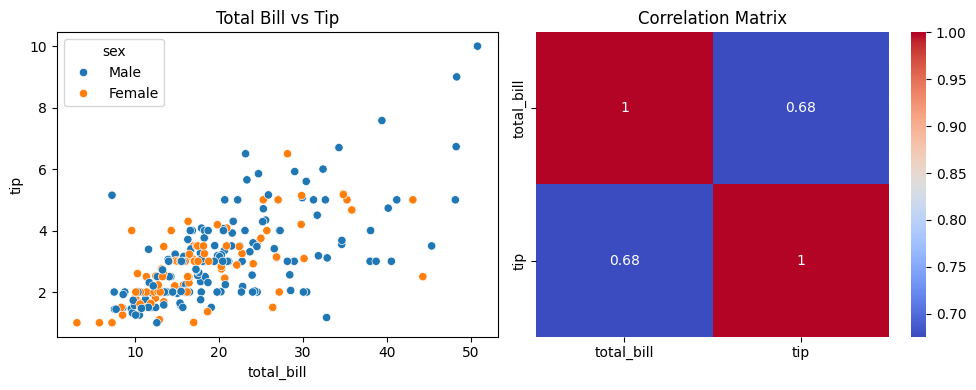

In [4]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")
plt.title("Total Bill vs Tip")

plt.subplot(1,2,2)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

plt.tight_layout()
plt.show()